In [14]:

import pandas as pd

# Example data loading
data = pd.read_csv('grouped_data_by_date_people (1).csv')
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)



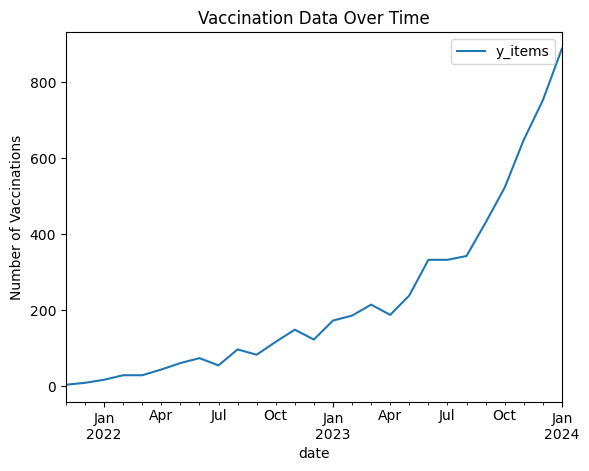

In [15]:
import matplotlib.pyplot as plt

data.plot()
plt.title('Vaccination Data Over Time')
plt.ylabel('Number of Vaccinations')
plt.show()


In [17]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data['y_items'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# If p-value > 0.05, the series is not stationary and you may need to difference it
if result[1] > 0.05:
    data['diff_y_items'] = data['y_items'].diff().dropna()


ADF Statistic: 3.7389173284792037
p-value: 1.0


In [18]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Assuming you have determined the best parameters (p, d, q) and seasonal parameters (P, D, Q, m)
model = SARIMAX(data['y_items'],
                order=(1, 1, 1),
                seasonal_order=(1, 1, 1, 12))
results = model.fit()

print(results.summary())


/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                            y_items   No. Observations:                   27
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 -74.534
Date:                            Wed, 24 Apr 2024   AIC                            159.069
Time:                                    11:37:20   BIC                            162.264
Sample:                                11-01-2021   HQIC                           158.773
                                     - 01-01-2024                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9994      0.030     33.560      0.000       0.941       1.058
ma.L1         -0.6381      0.596   

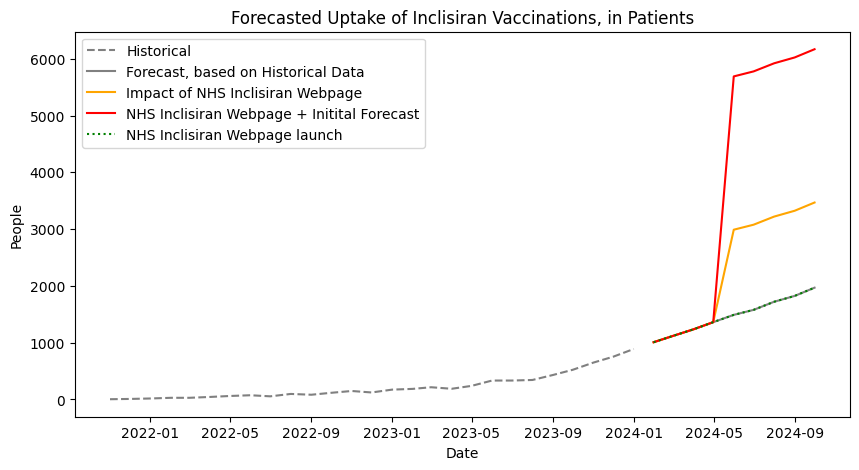

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAXResults

# Assuming results is loaded as before
forecast = results.get_forecast(steps=9)
forecast_index = pd.date_range(start='2024-01-01', periods=9, freq='M')
forecast.predicted_mean.index = forecast_index

# Calculate the monthly increments
monthly_increase_7500 = 7500 / 5
monthly_increase_13500 = 13500 / 5

# Initial Adjusted Forecasts with uniform distribution
adjusted_forecast_plus_15000 = forecast.predicted_mean.copy()
adjusted_forecast_plus_27000 = forecast.predicted_mean.copy()

# Apply the increments only to the dates from May to September 2024
mask = (forecast_index >= '2024-05-31') & (forecast_index <= '2024-09-30')
adjusted_forecast_plus_15000[mask] += monthly_increase_7500
adjusted_forecast_plus_27000[mask] += (monthly_increase_7500 + monthly_increase_13500)

# Plotting the results
plt.figure(figsize=(10, 5))
plt.plot(data.index, data['y_items'], label='Historical', linestyle='--', color='grey')
plt.plot(forecast_index, forecast.predicted_mean, label='Forecast, based on Historical Data', color='grey')
plt.plot(forecast_index, adjusted_forecast_plus_15000, label='Impact of NHS Inclisiran Webpage', color='orange')
plt.plot(forecast_index, adjusted_forecast_plus_27000, label='NHS Inclisiran Webpage + Initital Forecast', color='red')
plt.plot(forecast_index, forecast.predicted_mean, label='NHS Inclisiran Webpage launch', linestyle=':', color='green')

plt.title('Forecasted Uptake of Inclisiran Vaccinations, in Patients')
plt.ylabel('People')
plt.xlabel('Date')
plt.legend()
plt.show()


/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                            y_items   No. Observations:                   27
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 -74.534
Date:                            Wed, 24 Apr 2024   AIC                            159.069
Time:                                    19:05:19   BIC                            162.264
Sample:                                11-01-2021   HQIC                           158.773
                                     - 01-01-2024                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9994      0.030     33.560      0.000       0.941       1.058
ma.L1         -0.6381      0.596   

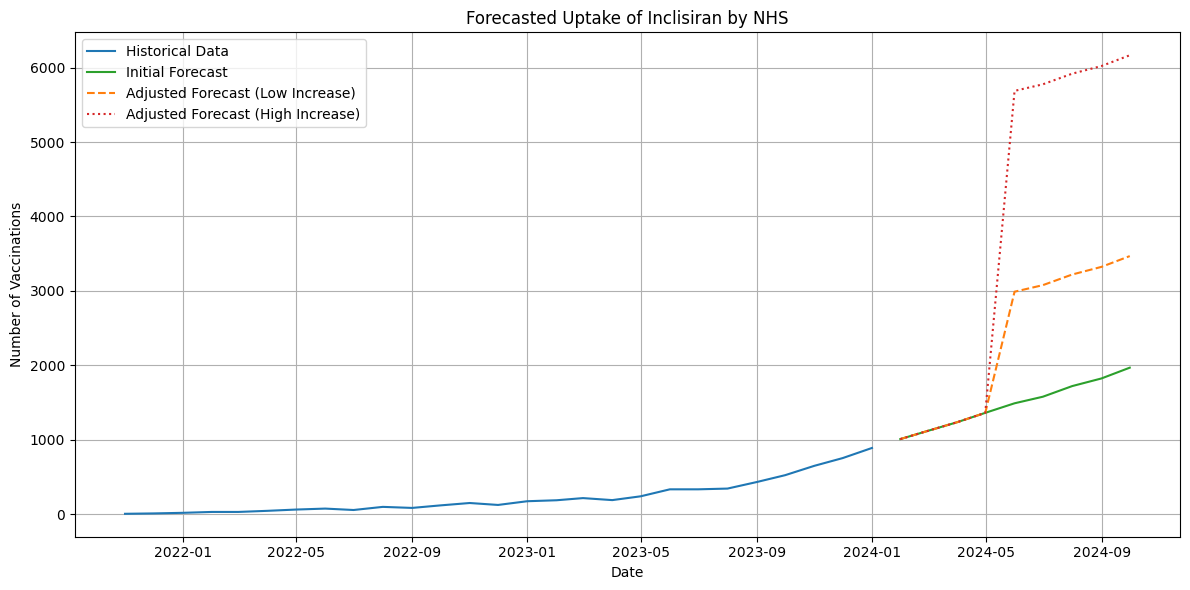